In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
SEED = 20201125
np.random.seed(SEED)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 离散型随机变量
## 二项分布
$P\{X=k\} = C_n^kp^k(1-p)^{n-k}$

【例】野外正在进行9（n=9）口石油勘探井的发掘工作，每一口井能够开发出油的概率是
0.1（p=0.1）。请问，最终所有的勘探井都勘探失败的概率？

(500000,)
0.386944


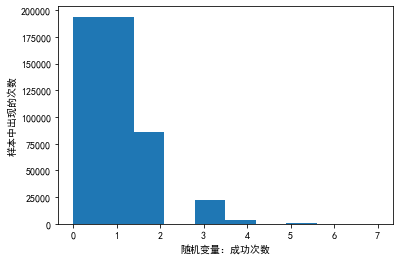

In [27]:
n = 9
p = 0.1
size = 500000
# 表示进行n次实验，每次实验成功的概率是p，抽样size次，也即n次伯努利实验进行的次数
# 该函数的返回值是n次实验中实验成功的次数
x = np.random.binomial(n,p,size)
print(x.shape)
print(np.sum(x==0)/size)
plt.hist(x)
plt.xlabel(u'随机变量：成功次数')
plt.ylabel(u'样本中出现的次数')
plt.show()

In [26]:
# 返回一个列表，列表中每个元素表述随机变量中对应值的概率
s = stats.binom.pmf(range(10),n,p)
print(np.around(s,3))

[0.387 0.387 0.172 0.045 0.007 0.001 0.    0.    0.    0.   ]


【例】模拟投硬币，投2次，请问两次都为正面的概率？

0.249502
0.500588
0.24991


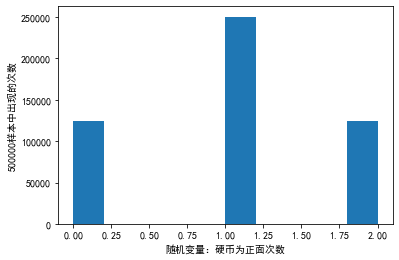

In [28]:
n = 2
p = 0.5
size = 500000
x = np.random.binomial(n,p,size)
print(np.sum(x==0)/size)
print(np.sum(x==1)/size)
print(np.sum(x==2)/size)
plt.hist(x)
plt.xlabel(u'随机变量：硬币为正面次数')
plt.ylabel(u'500000样本中出现的次数')
plt.show()

In [29]:
# 返回一个列表，列表中每个元素表述随机变量中对应值的概率
s = stats.binom.pmf(range(n+1),n,p)
print(np.around(s,3))

[0.25 0.5  0.25]


In [31]:
ev = stats.binom.stats(n,p,loc=0,moments='mv')
print(ev)

(array(1.), array(0.5))


## 泊松分布
泊松分布主要用于估计某个时间段某事件发生的概率 

$P\{X=k\} = \frac{\lambda^k}{k!}e^{-\lambda}$

【例】假定某航空公司预定票处平均每小时接到42次订票电话，那么10分钟内恰好接到6次电话的概
率是多少？

0.148826


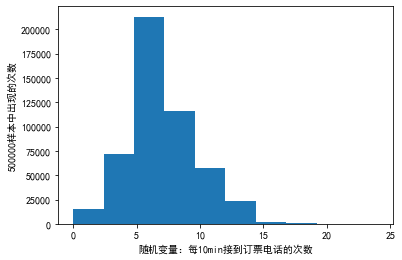

In [37]:
lam = 42/6 # 平均每十分钟接到42/6个订票电话
size = 500000
x = np.random.poisson(lam,size)
print(np.sum(x==6)/size)
plt.hist(x)
plt.xlabel(u'随机变量：每10min接到订票电话的次数')
plt.ylabel(u'500000样本中出现的次数')
plt.show()

In [34]:
#用poisson.pmf(k, mu)求对应分布的概率:概率质量函数 (PMF)
x = stats.poisson.pmf(6, lam)
print(x) 

0.14900277967433773


## 超几何分布
假设有限总体包含N个样本，其中质量合格的为m个，则剩余的N-m个为不合格样本，如果从该有限总体中抽取出n个样本，其中有k个是质量合格的概率为：
$$P(k,m,n,N) = \frac{C_m^k C_{N-m}^{n-k}}{C_N^n}$$

【例】一共20只动物里有7只是狗，抽取12只有3只狗的概率（无放回抽样）

0.1988012


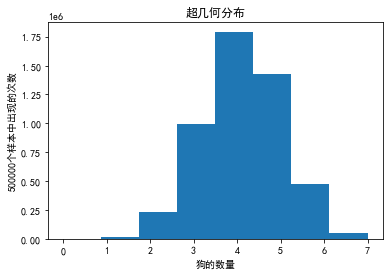

In [40]:
size = 5000000
x = np.random.hypergeometric(ngood=7,nbad=13,nsample=12,size = size)
print(np.sum(x==3)/size)
plt.hist(x, bins=8)
plt.xlabel(u'狗的数量')
plt.ylabel(u'500000个样本中出现的次数')
plt.title(u'超几何分布')
plt.show()

In [42]:
#用hypergeom.pmf(k, M, n, N, loc)来计算k次成功的概率
# M为总量，n为总体中有成功标志的样本个数，N，k是抽取N个样本k个是成功元素
s = stats.hypergeom.pmf(k=range(8),M=20,n=7,N = 12)
print(np.around(s,3))

[0.    0.004 0.048 0.199 0.358 0.286 0.095 0.01 ]


In [44]:
# 超几何分布的均值与方差
# 均值E(x) = N(n/M)
# 方差Var(x) = N(n/M)(1‐n/M)((M‐N)/(M‐1))
# 注释：考虑n次实验的超几何分布，令p=n/M,当总体容量足够大时((M‐N)/(M‐1))近似于1，此时数学期望为
# Np，方差为Np(1‐p).
#用stats(M, n, N, loc=0, moments='mv')计算均值和方差
stats.hypergeom.stats(20,7,12,moments='mv')

(array(4.2), array(1.14947368))

# 连续型随机变量
## 均匀分布

True
True
0.40007


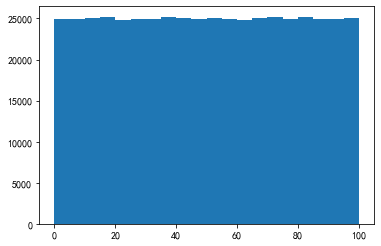

0.1
0.5
0.4


In [48]:
# 【例】在low到high范围内，创建大小为size的均匀分布的随机数。
size = 500000
a = 0
b = 100
x  = np.random.uniform(a,b,size=size)
print(np.all(x>=0))
print(np.all(x<100))
print((np.sum(x<50)-np.sum(x<10))/size)

plt.hist(x,bins=20)
plt.show()

a = stats.uniform.cdf(10,0,100)
b = stats.uniform.cdf(50,0,100)
print(a)
print(b)
print(b-a)

【例】根据指定大小产生[0,1)之间均匀分布的随机数。

In [61]:
np.random.seed(SEED)
print(np.random.rand())
print(np.random.rand(5))
print(np.random.rand(4,3))

0.8098159304646425
[0.03579724 0.20674657 0.94257697 0.62413889 0.01230949]
[[0.31290955 0.05072421 0.47959837]
 [0.73333412 0.23161854 0.93494929]
 [0.67984729 0.35497093 0.56270729]
 [0.3101304  0.21993047 0.11158845]]


In [62]:
np.random.seed(SEED)
print(np.random.uniform())
print(np.random.uniform(size = 5))
print(np.random.uniform(size=(4,3)))

0.8098159304646425
[0.03579724 0.20674657 0.94257697 0.62413889 0.01230949]
[[0.31290955 0.05072421 0.47959837]
 [0.73333412 0.23161854 0.93494929]
 [0.67984729 0.35497093 0.56270729]
 [0.3101304  0.21993047 0.11158845]]


可以发现二者一致

randint作为 uniform 的另一特例，可以得到 [low,high) 之间均匀分布的随机整数。若 high 不为 None 时，取[low,high)之间随机整数，否则取值[0,low)之间随机整数

In [64]:
x = np.random.randint(2,size=10)
print(x)
x = np.random.randint(5, size=(2, 4))
print(x)

[0 1 1 1 1 0 0 1 1 1]
[[4 2 1 3]
 [3 0 0 1]]


## 正态分布

0.682596
0.95452
0.997392


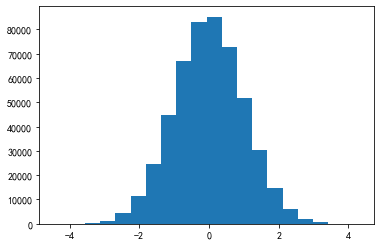

In [66]:
size = 500000
x = np.random.randn(size)
y1 = (np.sum(x<1)-np.sum(x<-1))/size
y2 = (np.sum(x<2)-np.sum(x<-2))/size
y3 = (np.sum(x<3)-np.sum(x<-3))/size
print(y1)
print(y2)
print(y3)

plt.hist(x,bins=20)
plt.show()

In [67]:
y1 = stats.norm.cdf(1)-stats.norm.cdf(-1)
y2 = stats.norm.cdf(2)-stats.norm.cdf(-2)
y3 = stats.norm.cdf(3)-stats.norm.cdf(-3)
print(y1)
print(y2)
print(y3)

0.6826894921370859
0.9544997361036416
0.9973002039367398


In [68]:
x = 0.5*np.random.randn(2,4)+5
print(x)

[[3.98331448 4.78707235 4.64292411 5.25091321]
 [5.34597445 4.71981076 6.05580298 5.3508365 ]]


In [72]:
mu = 5
sigma = 0.5
x = np.random.normal(mu,sigma,(2,4))
print(x)
# 样本均值和方差
print(np.mean(x))
print(np.std(x,ddof=1))

[[4.02631286 5.35999413 5.1404164  4.7010599 ]
 [5.87862946 4.7673459  5.00247585 5.5768265 ]]
5.056632625600145
0.5756907578036178


# 指数分布

指数分布描述时间发生的时间长度间隔
$$f(x)=\begin{cases}
\lambda e^{-\lambda x},  & \text{x$>0$}\\
0, & \text{x $\le$ 0}
\end{cases}$$

0.631278
0.864898
0.949886


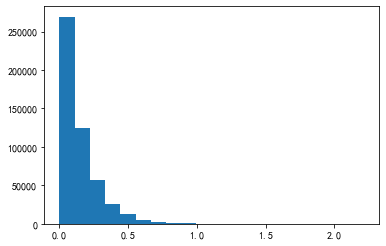

In [75]:
lam = 7
size = 500000
x = np.random.exponential(1/lam,size)
y1 = (np.sum(x<1/7)/size)
y2 = (np.sum(x<2/7)/size)
y3 = (np.sum(x<3/7)/size)
print(y1)
print(y2)
print(y3)

plt.hist(x,bins=20)
plt.show()

In [77]:
y1 = stats.expon.cdf(1/7,scale=1/lam)
y2 = stats.expon.cdf(2/7,scale=1/lam)
y3 = stats.expon.cdf(3/7,scale=1/lam)
print(y1)
print(y2)
print(y3)

0.6321205588285577
0.8646647167633873
0.950212931632136


# 其他随机
## 随机从序列获取元素

In [78]:
x = np.random.choice(10,3)
print(x)

[2 6 8]


In [80]:
x = np.random.choice(10,3,p=[0.05,0,0.05,0.9,0,0,0,0,0,0])
print(x)

[3 3 3]


In [81]:
x = np.random.choice(10,3,replace=False,p=[0.05,0,0.05,0.9,0,0,0,0,0,0])
print(x)

[3 2 0]


In [82]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
x = np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])
print(x) # ['pooh' 'rabbit' 'pooh' 'pooh' 'pooh']

['pooh' 'pooh' 'pooh' 'pooh' 'pooh']


## 打乱数据集

In [84]:
x = np.arange(10)
np.random.shuffle(x)
print(x)

[3 9 7 2 4 5 1 0 6 8]


In [85]:
print(np.random.shuffle([1,4,9,12,15]))

None


In [86]:
x = np.arange(20).reshape((5,-1))
print(x)
np.random.shuffle(x)
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]
 [16 17 18 19]]


In [87]:
x = np.arange(20).reshape((5, 4))
print(x)
y = np.random.permutation(x)
print(y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[16 17 18 19]
 [ 4  5  6  7]
 [ 0  1  2  3]
 [12 13 14 15]
 [ 8  9 10 11]]


# 练习题
创建一个形为5×3的二维数组，以包含5到10之间的随机数。

In [89]:
arr = np.random.randint(5,10,(5,3))
arr

array([[5, 9, 8],
       [8, 5, 7],
       [5, 9, 7],
       [8, 7, 7],
       [9, 5, 9]])

In [90]:
arr = np.random.uniform(5, 10, [5, 3])
arr

array([[6.70845506, 7.74130669, 9.04928563],
       [6.46002629, 6.73309981, 6.40742393],
       [5.57153724, 7.39612456, 8.33749801],
       [6.55610868, 6.91942298, 7.13428688],
       [8.7350097 , 5.66950388, 5.59097854]])